In [1]:
import pandas as pd
import matplotlib.pyplot as plt  
from datetime import datetime   #数据索引改为时间
import numpy as np
import statsmodels.api as sm     #acf,pacf图
from statsmodels.tsa.stattools import adfuller  #adf检验
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.arima_model import ARIMA  

In [58]:
ds_wordle = pd.read_csv('C:/Users/65426/Desktop/MCM/Problem_C_Data_Wordle.csv')

print('ds_wordle:\n',ds_wordle.describe())
print(ds_wordle)

ds_wordle:
        Contest number  Number of  reported results  Number in hard mode  \
count      359.000000                   359.000000           359.000000   
mean       381.000000                 90918.877437          5098.350975   
std        103.778611                 89274.374730          3166.612389   
min        202.000000                  2569.000000          1362.000000   
25%        291.500000                 30308.500000          2848.500000   
50%        381.000000                 44578.000000          3548.000000   
75%        470.500000                120294.000000          7004.500000   
max        560.000000                361908.000000         15369.000000   

            1 try     2 tries     3 tries     4 tries     5 tries     6 tries  \
count  359.000000  359.000000  359.000000  359.000000  359.000000  359.000000   
mean     0.470752    5.844011   22.727019   32.927577   23.637883   11.559889   
std      0.782923    4.076525    7.781092    5.353983    5.946908    

In [22]:
csvFile = 'C:/Users/65426/Desktop/MCM/Problem_C_Data_Wordle.csv'
#读取数据，指定日期列为指标，Pandas自动将“日期”列识别为Datetime格式
data = pd.read_csv(csvFile, index_col = u'Date')
data = pd.DataFrame(data)
data = data[0:360]
data = data[['Number of  reported results']]
data

,Number of reported results
Date,
2022/1/7,80630
2022/1/8,101503
2022/1/9,91477
2022/1/10,107134
2022/1/11,153880
...,...
2022/12/27,20879
2022/12/28,20160
2022/12/29,20001


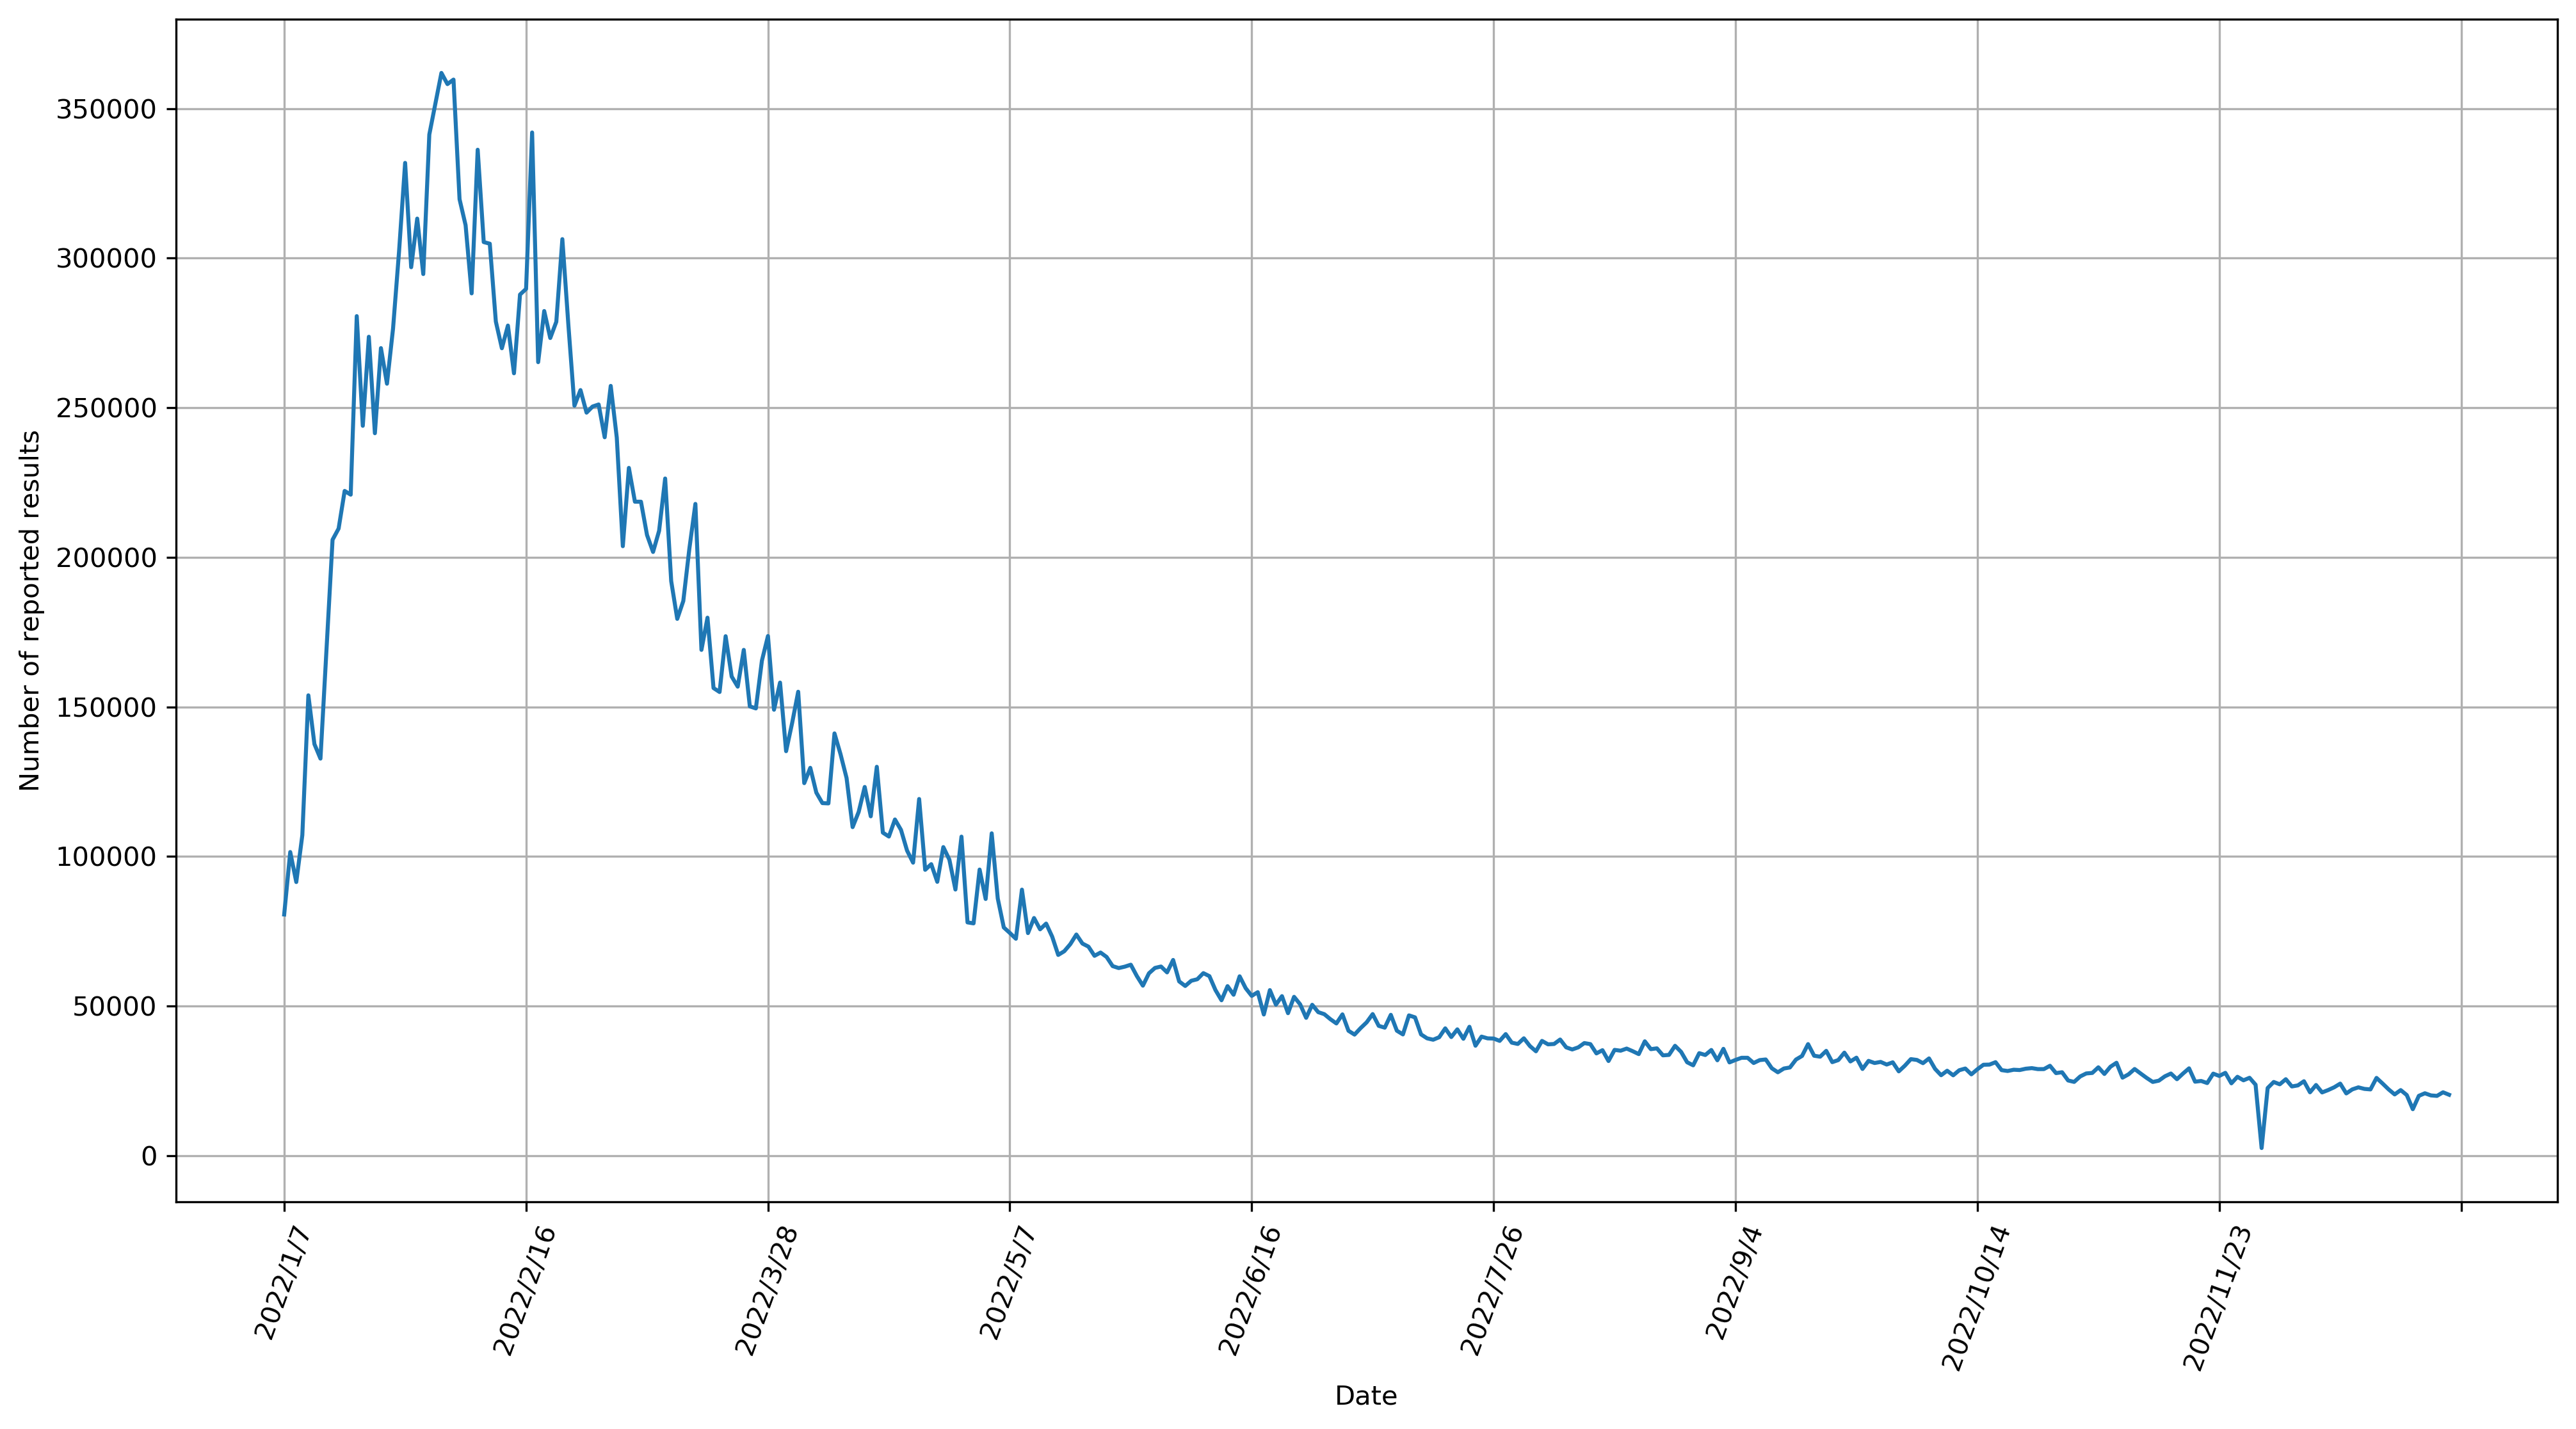

In [26]:
#时序图
plt.figure(figsize=(16,8), dpi=300)
plt.rcParams['axes.unicode_minus'] = False      #用来正常显示负号
plt.plot(data)
plt.xticks(np.arange(0,400,40),rotation=70)
#plt.yticks(np.arange(1100, 2100, 100))
plt.grid()
plt.xlabel('Date',fontsize=10,verticalalignment='top')
plt.ylabel('Number of reported results',fontsize=10,horizontalalignment='center')
plt.show()

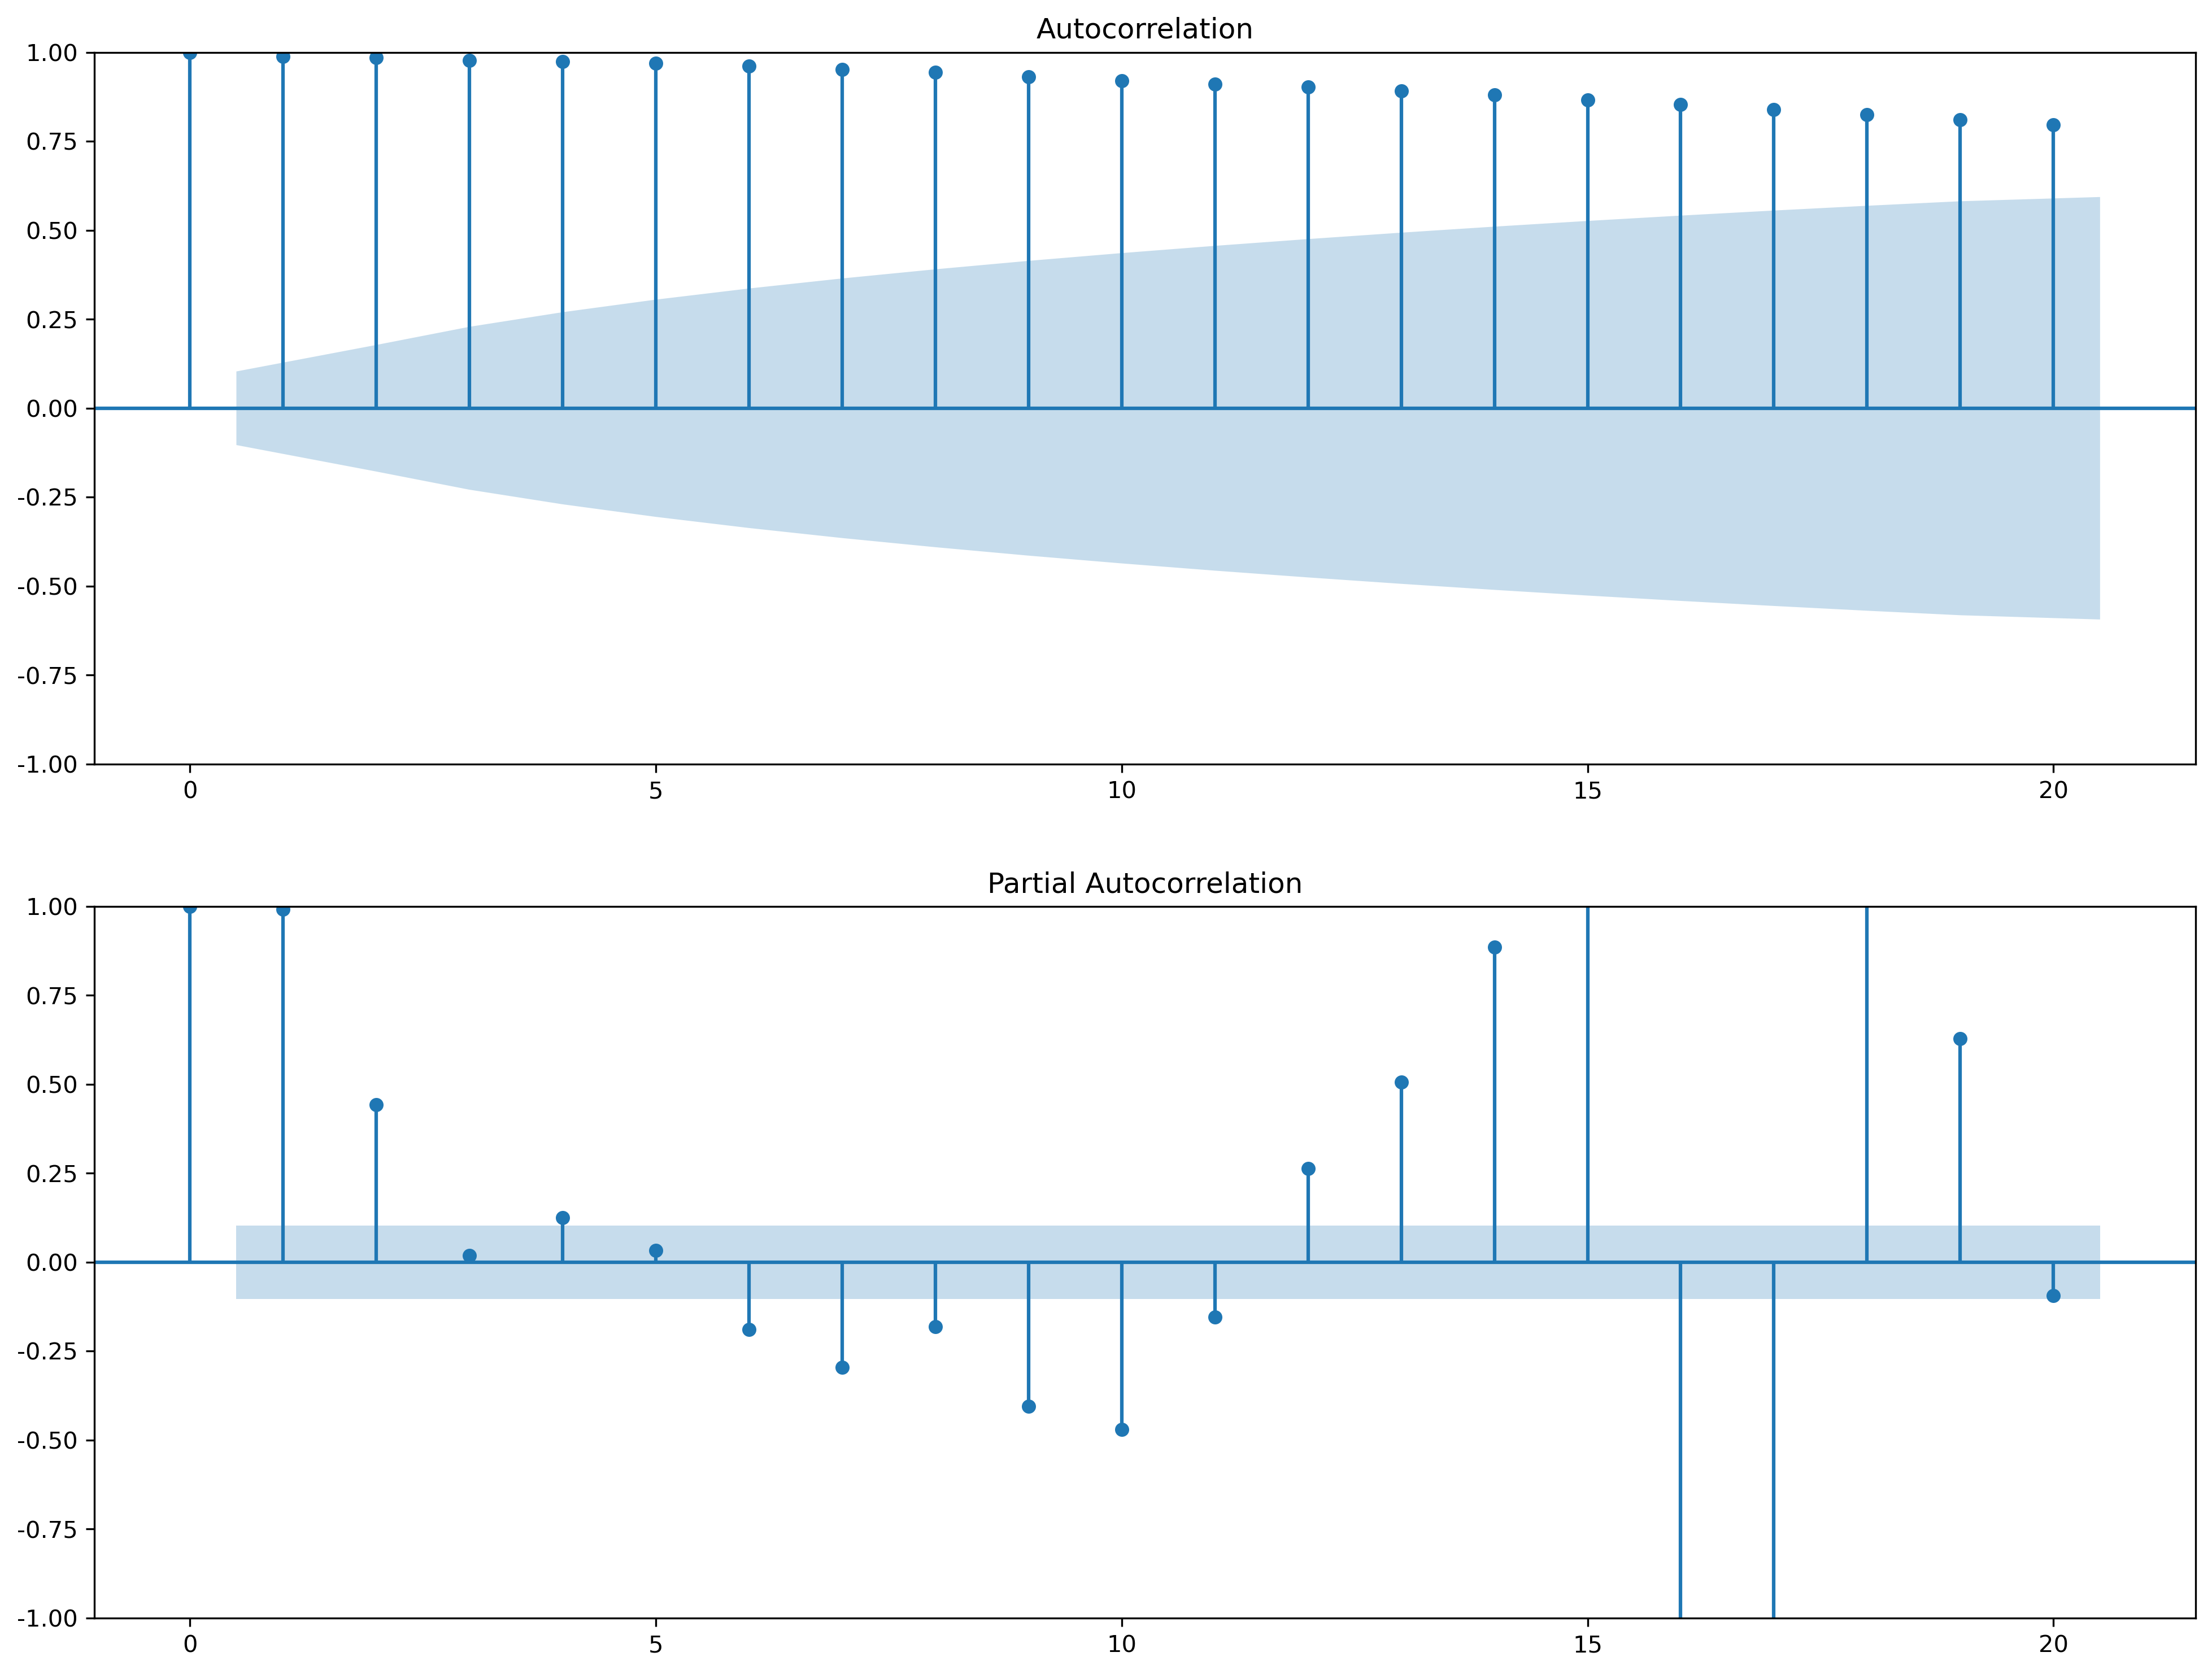

In [32]:
fig = plt.figure(figsize=(16,12),dpi=300)
ax1=fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(data,lags=20,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(data,lags=20,ax=ax2)
plt.show()

In [81]:
data

,Number of reported results
Date,
2022/1/7,80630
2022/1/8,101503
2022/1/9,91477
2022/1/10,107134
2022/1/11,153880
...,...
2022/12/27,20879
2022/12/28,20160
2022/12/29,20001


In [90]:
temp = np.array(data)
t = adfuller(temp)  # ADF检验
output=pd.DataFrame(index=['Test Statistic Value', "p-value", "Lags Used", "Number of Observations Used","Critical Value(1%)","Critical Value(5%)","Critical Value(10%)"],columns=['value'])
output['value']['Test Statistic Value'] = t[0]
output['value']['p-value'] = t[1]
output['value']['Lags Used'] = t[2]
output['value']['Number of Observations Used'] = t[3]
output['value']['Critical Value(1%)'] = t[4]['1%']
output['value']['Critical Value(5%)'] = t[4]['5%']
output['value']['Critical Value(10%)'] = t[4]['10%']
output


,value
Test Statistic Value,-3.866706
p-value,0.002294
Lags Used,17
Number of Observations Used,341
Critical Value(1%),-3.449673
Critical Value(5%),-2.870053
Critical Value(10%),-2.571306


            Number of  reported results
Date                                   
2022/1/7                            NaN
2022/1/8                        20873.0
2022/1/9                       -10026.0
2022/1/10                       15657.0
2022/1/11                       46746.0
...                                 ...
2022/12/27                        868.0
2022/12/28                       -719.0
2022/12/29                       -159.0
2022/12/30                       1203.0
2022/12/31                       -824.0

[359 rows x 1 columns]


<Figure size 4800x3600 with 0 Axes>

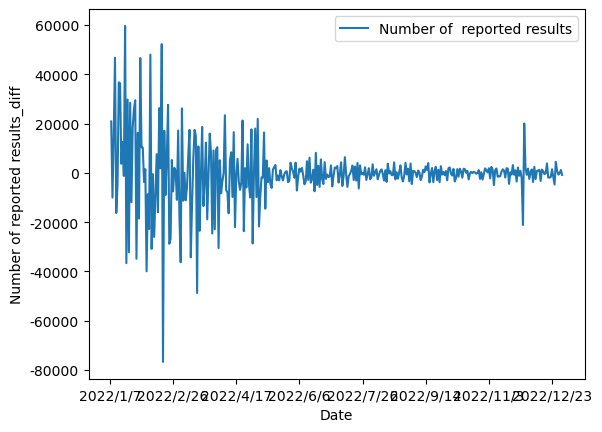

In [91]:
data1= data.diff(1)
print(data1)
plt.figure(figsize=(16,12),dpi=300)
data1.plot()
plt.xlabel('Date',fontsize=10,verticalalignment='top')
plt.ylabel('Number of reported results_diff',fontsize=10,horizontalalignment='center')
plt.show()

            Number of  reported results
Date                                   
2022/1/7                            NaN
2022/1/8                            NaN
2022/1/9                       -30899.0
2022/1/10                       25683.0
2022/1/11                       31089.0
...                                 ...
2022/12/27                      -3589.0
2022/12/28                      -1587.0
2022/12/29                        560.0
2022/12/30                       1362.0
2022/12/31                      -2027.0

[359 rows x 1 columns]


<Figure size 4800x3600 with 0 Axes>

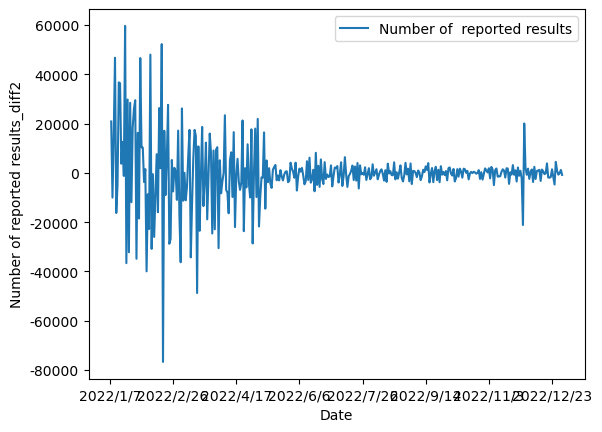

In [96]:
data2= data1.diff(1)
print(data2)
plt.figure(figsize=(16,12),dpi=300)
data1.plot()
plt.xlabel('Date',fontsize=10,verticalalignment='top')
plt.ylabel('Number of reported results_diff2',fontsize=10,horizontalalignment='center')
plt.show()

In [108]:
# 为了控制计算量，我们限制AR最大阶不超过6，MA最大阶不超过4。
p ,q = sm.tsa.arma_order_select_ic(data,max_ar=6,max_ma=4,ic='aic')['aic_min_order']  # AIC
print(p,q)

D:\Anaconda\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
D:\Anaconda\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
D:\Anaconda\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
D:\Anaconda\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
D:\Anaconda\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization fail

6 1


D:\Anaconda\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [121]:
yv_serie = pd.Series(data['Number of reported results'])##样本外数据

def testwhitenoise(data):
    m = 20# 检验10个自相关系数
    acf,q,p = sm.tsa.acf(data,nlags=m,qstat=True)
    out = np.c_[range(1,m+1),acf[1:],q,p]
    output = pd.DataFrame(out,columns=['lag','自相关系数','统计量Q值','p_values'])
    output = output.set_index('lag')# 设置第一列索引名称,可省略重复索引列1
    print(output)

def teststeady(data,count=0):
    res_ADF = ADF(data)
    print('ADF检验结果为：', res_ADF)
    Pv = res_ADF[1]
    if Pv > 0.05:
        print('\033[1;31mP值：%s，原始序列不平稳，要进行差分！\033[0m' % round(Pv,5))
        count = count + 1
        print('\033[1;32m进行了%s阶差分后的结果如下\033[0m' % count)
        data = data.diff(1).dropna()
        teststeady(data,count)
    else:
        print('\033[1;34mP值：%s，原始序列平稳，继续建模\033[0m'% round(Pv,5))
    return data
testwhitenoise(yv_serie)
teststeady(yv_serie)

KeyError: 'Number of reported results'

In [113]:
def confirm_p_q(data):
    fig = plt.figure(figsize=(8,6))
    testwhitenoise(data)
    train = teststeady(data)
    ax1 = fig.add_subplot(211)
    fig = sm.graphics.tsa.plot_pacf(train, lags=10, ax=ax1)
    ax2 = fig.add_subplot(212)
    fig = sm.graphics.tsa.plot_acf(train, lags=10, ax=ax2)
    plt.show()  ###可视化定阶

    pmax = int(len(data) / 10)
    qmax = int(len(data) / 10)
    AIC = sm.tsa.arma_order_select_ic(train,max_ar=pmax,max_ma=qmax,ic='aic')['aic_min_order']
    BIC = sm.tsa.arma_order_select_ic(train,max_ar=pmax,max_ma=qmax,ic='bic')['bic_min_order']
    HQIC = sm.tsa.arma_order_select_ic(train,max_ar=pmax,max_ma=qmax,ic='hqic')['hqic_min_order']
    print('AIC：',AIC)
    print('BIC：',BIC)
    print('HQIC：',HQIC)
    return AIC
pq = confirm_p_q(data)##返回p,q值

NameError: name 'testwhitenoise' is not defined

<Figure size 800x600 with 0 Axes>

In [109]:
#对模型进行定阶
pmax = int(len(df) / 10)    #一般阶数不超过 length /10
qmax = int(len(df) / 10)
bic_matrix = []
for p in range(6):
    temp= []
    for q in range(4):
        try:
            temp.append(ARIMA(data,(p, 1, q)).fit().bic)
        except:
            temp.append(None)
        bic_matrix.append(temp)

bic_matrix = pd.DataFrame(bic_matrix)   #将其转换成Dataframe 数据结构
p,q = bic_matrix.stack().idxmin()   #先使用stack 展平， 然后使用 idxmin 找出最小值的位置
print(u'BIC 最小的p值 和 q 值：%s,%s' %(p,q))  #  BIC 最小的p值 和 q 值：0,1
#所以可以建立ARIMA 模型，ARIMA(0,1,1)

TypeError: reduction operation 'argmin' not allowed for this dtype

In [111]:
model = ARIMA(data,(6,1,1)).fit()
model.summary2() 

NotImplementedError: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been removed in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and statsmodels.tsa.SARIMAX.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained. It also offers alternative specialized
parameter estimators.


In [112]:
predictions_ARIMA_diff = pd.Series(model.fittedvalues, copy=True)
print(predictions_ARIMA_diff)

NameError: name 'model' is not defined